<p style="font-family: Arial; font-size:3vw;color:purple; font-style:bold"><br>
Classification Exercise Notebook Solutions
</p><br>

# Exercise Notebook Instructions

### 1. Important: Only modify the cells which instruct you to modify them - leave "do not modify" cells alone.  

The code which tests your responses assumes you have run the startup/read-only code exactly.

### 2. Work through the notebook in order.

Some of the steps depend on previous, so you'll want to move through the notebook in order.

### 3. It is okay to use numpy libraries.

You may find some of these questions are fairly straightforward to answer using built-in numpy functions.  That's totally okay - part of the point of these exercises is to familiarize you with the commonly used numpy functions.

### 4. Seek help if stuck

If you get stuck, don't worry!  You can either review the videos/notebooks from this week, ask in the course forums, or look to the solutions for the correct answer.  BUT, be careful about looking to the solutions too quickly.  Struggling to get the right answer is an important part of the learning process.

In [6]:
# DO NOT MODIFY

# import appropriate libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
weather_path = '../../../../datasets/weather/daily_weather.csv' 

In [7]:
# DO NOT MODIFY

# we will use the daily weather dataset of this exercise.

def get_data():
    return pd.read_csv(weather_path)

df = get_data()

<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>

Exercise 1: Detect if NULLs Exist in the Data<br><br></p>


In the cell below, modify the function to RETURN True if there exists a NULL value in data given as input, otherwise False

In [8]:
# modify this cell

def detect_nulls(matx):
    ### BEGIN SOLUTION
    return matx.isnull().any(axis=1).any()
    ### END SOLUTION

In [9]:
# DO NOT MODIFY
ans = True

try: assert np.alltrue(detect_nulls(df) == ans)
except AssertionError as e: print("Try again, your output did not match the expected answer above")

<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>

Exercise 2: Data Cleaning<br><br></p>


In the cell below, modify the function to remove every row that has atleast one NULL,
and RETURN a new data frame.

In [10]:
# modify this cell

def clean_data(matx):
    ### BEGIN SOLUTION
    return matx.dropna()
    ### END SOLUTION

In [11]:
# DO NOT MODIFY

try: 
    df2=clean_data(df)
    assert np.alltrue(df2.shape[0] == 1064)
except AssertionError as e: print("Try again")

In [12]:
df2.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,545.001880,918.903180,65.022609,142.306756,5.485793,148.480424,6.999714,0.182023,266.393697,34.077440,35.148381
std,316.796111,3.179040,11.168033,69.149472,4.534427,67.154911,5.590790,1.534493,1503.092216,25.356668,22.365475
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,269.750000,916.595376,57.398000,65.979244,2.245529,76.335351,3.064608,0.000000,0.000000,15.093365,17.360468
50%,543.500000,918.942281,65.778479,165.937461,3.869906,176.350000,4.943637,0.000000,0.000000,23.135000,24.371286
75%,819.250000,921.169054,73.530872,191.100000,7.264463,201.125000,8.747888,0.000000,0.000000,44.660000,51.922500
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>

Exercise 3: Convert to a Classification Task<br><br></p>

In the cell below, modify the function that takes three inputs: a dataframe, a column name C, and a threshold value X.
The function has to create a new column called 'target' which is 1
when given column C is > X, otherwise 0. Return a new dataframe with this new column, and keep all the 
previous columns.

In [13]:
# modify this cell

def classification_task(df, C, X):
    ### BEGIN SOLUTION
    df_copy = df.copy()
    df_copy['target'] = (df_copy[C] > X)*1
    return df_copy
    ### END SOLUTION

In [14]:
# DO NOT MODIFY

ans = 558

try: 
    c = classification_task(df2, 'air_temp_9am', 65.0)
    assert np.alltrue(c['target'].sum() == ans)
except AssertionError as e: print("Try again, your solution did not produce the expected output above")

In [15]:
del c['number']

In [16]:
def get_ready(df):
    from sklearn.model_selection import train_test_split
    # declare features to use
    features = ['air_pressure_9am','avg_wind_direction_9am','avg_wind_speed_9am','max_wind_direction_9am']
    # create copy
    df_copy = df.copy()
    df_copy['target'] = (df_copy['air_temp_9am'] > 65.0)*1
    # separate features from target
    X=df_copy[features]
    y=df_copy['target']
    # perform split and return
    return train_test_split(X, y, test_size=0.33, random_state=983)

In [18]:
X_train, X_test, y_train, y_test = get_ready(pd.read_csv(weather_path).dropna())

<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>

Exercise 4: Create a Classifier<br><br></p>

In the cell below, modify the function to take X_train, y_train only and RETURN a classifier
for predicting the y_train based on columns in X_train. You can pick any classifier model.

The function should RETURN a trained model. We will test your classifier on X_test and y_test

In [42]:
# modify this cell

def train_classifier(X_train, y_train, flag=None):
    ### BEGIN SOLUTION
    
    if flag is None:
        flag = 1
    # default case    
    if flag == 1:
        from sklearn.tree import DecisionTreeClassifier
        _classifier = DecisionTreeClassifier(max_leaf_nodes=45, random_state=3)
        _classifier.fit(X_train, y_train)
    
    if flag == 2:
        from sklearn.linear_model import SGDClassifier
        _classifier = SGDClassifier()
        _classifier.fit(X_train, y_train)
        
    if flag == 3:
        from sklearn import svm
        _classifier = svm.SVC()
        _classifier.fit(X_train, y_train)
    
    
    return _classifier
    ### END SOLUTION

In [53]:
# DO NOT MODIFY

min_score = 0.63

try: 
    v = train_classifier(X_train, y_train)
    y_pred = v.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    assert np.alltrue(accuracy_score(y_test, y_pred) > min_score)
except AssertionError as e: print("Keep trying - can you get an accuracy_score > %f" % min_score)

0.6363636363636364


In [64]:
decision_tree_results= train_classifier(X_train, y_train, 1 )
decision_tree_accuracy = accuracy_score(y_test,decision_tree_v1.predict(X_test))

In [66]:
sgdc_classifier_results = train_classifier(X_train, y_train,2 ) 
sgdc_accuracy = accuracy_score(y_test,sgdc_classifier_results.predict(X_test))

/Users/smd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [67]:
svm_classifier_results = train_classifier(X_train, y_train,3 )
svm_accuracy = accuracy_score(y_test,svm_classifier_results.predict(X_test))

/Users/smd/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 0.98, 'Accuracy score comparison among three different classification techniques for temperature threshold prediction')

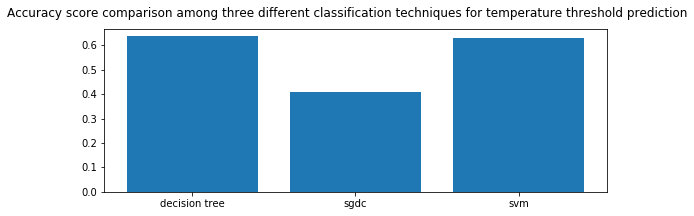

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
def mapper(x): return accuracy_score()
data = {'decision tree':decision_tree_accuracy, 'sgdc': sgdc_accuracy, 'svm':svm_accuracy}
names = list(data.keys())
values = list(data.values())
fig, ax  = plt.subplots(1,1, figsize=(9,3), sharey=True)
ax.bar(names, values)
fig.suptitle('Accuracy score comparison among three different classification techniques for temperature threshold prediction')